In [6]:
import PIL.Image
import numpy as np
from typing import Union
from glob import glob
import os


# [IAPR][iapr]: Project


**Group ID:** xx

**Author 1 (sciper):** Student Name 1 (xxxxx)  
**Author 2 (sciper):** Student Name 2 (xxxxx)   
**Author 3 (sciper):** Student Name 3 (xxxxx)   

**Release date:** 27.04.2023


## Important notes

The assignments are designed to teach practical implementation of the topics presented during class as well as preparation for the final project, which is a practical project which ties together the topics of the course. 

As such, in the lab assignments/final project, unless otherwise specified, you may, if you choose, use external functions from image processing/ML libraries like opencv and sklearn as long as there is sufficient explanation in the lab report. For example, you do not need to implement your own edge detector, etc.

**! Before handling back the notebook !** rerun the notebook from scratch `Kernel` > `Restart & Run All`


[iapr]: https://github.com/LTS5/iapr

---
## 0. Introduction

In this project, you will be working on solving tiling puzzles using image analysis and pattern recognition techniques. Tiling puzzles are a classic type of puzzle game that consists of fitting together pieces of a given shape (in this case squared to form a complete image. The goal of this project is to develop an algorithm that can automatically reconstruct tiling puzzles from a single input image. 

---

## 1. Data

### Input data
To achieve your task, you will be given images that look like this:


![train_00.png](data_project/project_description/train_00.png)
### Example puzzle content
Example of input of solved puzzles. 
Solution 1
<img src="data_project/project_description/solution_example.png" width="512"/>

Solution 2
<img src="data_project/project_description/solution_example2.jpg" width="512"/>


### 1.1. Image layout

- The input for the program will be a single image with a size of __2000x2000 pixels__, containing the pieces of the tiling puzzles randomly placed in it. The puzzles sizes vary from __3x3, 3x4, or 4x4__ size. 
    -__You are guaranteed to always have the exact number of pieces for each puzzle__ 
        -For each puzzle you always are expected to find exaclty 9,12,16 pieces
        -If you find something else, either you are missing pieces, or added incorrect pieces for the puzzle

- The puzzle pieces are square-shaped with dimensions of 128x128 pixels (before rotation). 

- The input image will contain pieces from __two or three (but never four)__ different tiling puzzles, as well as some __extra pieces (outliers)__ that do not belong to either puzzle.


## 2. Tasks (Total 20 points) 


The project aims to:
1) Segment the puzzle pieces from the background (recover the pieces of 128x128 pixels)   \[ __5 points__ \] 

2) Extract features of interest from puzzle pieces images \[ __5 points__ \]   

3) Cluster puzzle pieces to identify which puzzle they belong, and identify outliers.  \[ __5 points__ \]   

4) Solve tiling puzzle (find the rotations and translations to correctly allocate the puzzle pieces in a 3x3, 3x4 or 4x4 array.) \[ __5 points__ \]   

##### The images used for the puzzles have self-repeating patterns or textures, which ensures that all puzzle pieces contain more or less the same features regardless of how they were cut. 




### 1.2. Output solution pieces.

For each inpute image, the output solution will include N images with solved puzzles, where N is the number of puzzles in the input image. and M images, that are Each of these images will contain the solved solution to one of the N puzzles in the input. 


-  Example input:  train_05.png

- Example solution:
        -solution_05_00.png solution_05_01.png solution_05_02.png 
        -outlier_05_00.png outlier_05_01.png outlier_05_02.png ...

- Example input:  train_07.png
- Example solution:
        -solution_07_00.png solution_07_01.png 
        -outlier_07_00.png outlier_07_01.png outlier_07_02.png ...


__Watch out!__ output resolution should always be like this:  
<table ><tr><th >Puzzle pieces <th><th> pixel dimentions <th> <th> pixel dimentions <th> <tr>
<tr><td> 3x3 <td><td> 384x384 <td><td> 3(128)x3(128) <td> <tr>
<tr><td> 3x4 <td><td> 384x512 <td><td> 3(128)x4(128)<tr>
<tr><td> 4x4 <td><td> 512x512 <td><td> 4(128)x4(128)<tr>
<tr><td> 1x1 (outlier)<td><td> 128x128 <td><td> (1)128x(1)128 <td><tr><table>





__Order of the solutions (and rotations) it's not a problem for the grading__




the output solution will be a final image of resolution (1283)x(1283), with each piece correctly placed in its corresponding location in the 3x3 array. Similarly, if the puzzle consists of 3x4 or 4x4 pieces, the output solution will be an image of resolution (1283)x(1284) or (1284)x(1284)



### 1.3 Data folder Structure

You can download the data for the project here: [download data](https://drive.google.com/drive/folders/1k3xTH0ZhpqZb3xcZ6wsOSjLzxBNYabg3?usp=share_link)

```
data_project
│
└─── project_description
│    │    example_input.png      # example input images
│    │    example_textures1.png      # example input images
│    │    example_textures2.png      # example input images
│    └─── ultimate_test.jpg   # If it works on that image, you would probably end up with a good score
│
└─── train
│    │    train_00.png        # Train image 00
│    │    ...
│    │    train_16.png        # Train image 16
│    └─── train_labels.csv    # Ground truth of the train set
|    
└────train_solution
│    │    solution_00_00.png        # Solution puzzle 1 from Train image 00
│    │    solution_00_01.png        # Solution puzzle 2 from Train image 00
│    │    solution_00_02.png        # Solution Puzzle 3 from Train image 00
│    │    outlier_00_00.png         # outlier     from Train image 00
│    │    outlier_00_01.png         # outlier     from Train image 00
│    │    outlier_00_03.png         # outlier     from Train image 00
│    │    ...
│    │    solution_15_00.png        # Solution puzzle 1 from Train image 15
│    │    solution_15_01.png        # Solution puzzle 2 from Train image 15
│    │    outlier_15_00.png         # outlier     from Train image 15
│    └─── outlier_15_01.png         # outlier     from Train image 15
│
└─── test
     │    test_00.png         # Test image 00 (day of the exam only)
     │    ...
     └─── test_xx.png             # Test image xx (day of the exam only)
```



## 3. Evaluation

**Before the exam**
   - Create a zipped folder named **groupid_xx.zip** that you upload on moodle (xx being your group number).
   - Include a **runnable** code (Jupyter Notebook and external files) and your presentation in the zip folder.
   
**The day of the exam**
   - You will be given a **new folder** (test folder) with few images, but **no ground truth** (no solutions).
   - We will ask you to run your pipeline in **real time** and to send us your prediction of the task you obtain with the provided function **save_results**. 
   - On our side, we will compute the performance of your classification algorithm. 
   - To evaluate your method, we will use the **evaluate_solution** function presented below. To understand how the provided functions work, please read the documentation of the functions in **utils.py**.
   - **Please make sure your function returns the proper data format to avoid points penalty on the day of the exam**. 
---


## 4. Your code

In [7]:
## load images
import os 
from PIL import Image


import numpy as np
import cv2
import matplotlib.pyplot as plt

import numpy as np
from skimage.filters import threshold_local
from skimage.util import img_as_ubyte
from skimage.color import rgb2hsv
from skimage.color import rgb2hsv


In [8]:
nb_train =11

In [9]:

def load_input_image(image_index ,  folder ="train2" , path = "data_project"):
    
    filename = "train_{}.png".format(str(image_index).zfill(2))
    path_solution = os.path.join(path,folder , filename )
    
    im= Image.open(os.path.join(path,folder,filename)).convert('RGB')
    im = np.array(im)
    return im

def save_solution_puzzles(image_index , solved_puzzles, outliers  , folder ="train" , path = "data_project"  ,group_id = 0):
    
    path_solution = os.path.join(path,folder + "_solution_{}".format(str(group_id).zfill(2)))
    if not  os.path.isdir(path_solution):
        os.mkdir(path_solution)

    print(path_solution)
    for i, puzzle in enumerate(solved_puzzles):
        filename =os.path.join(path_solution, "solution_{}_{}.png".format(str(image_index).zfill(2), str(i).zfill(2)))
        Image.fromarray(puzzle).save(filename)

    for i , outlier in enumerate(outliers):
        filename =os.path.join(path_solution, "outlier_{}_{}.png".format(str(image_index).zfill(2), str(i).zfill(2)))
        Image.fromarray(outlier).save(filename)




Load the image


In [10]:
train_image = []
i = 0
while i <= nb_train:
    train_image.append(load_input_image(i))
    i += 1



In [11]:
def edge_detector(image):
    # Convert the image to grayscale
    img_gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

    # Blur the image for better edge detection
    img_blur = cv2.GaussianBlur(img_gray, (3,3), 0) 

    # Canny Edge Detection
    edges = cv2.Canny(image=img_blur, threshold1=0.5, threshold2=20) # Canny Edge Detection



    return edges

In [12]:
def pre_processing(edge,min_size=300) :
    # Perform morphological closing to fill small holes
    kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (12, 12))
    kernel_3 = cv2.getStructuringElement(cv2.MORPH_RECT, (3, 3))

    
    closed = cv2.morphologyEx(edge, cv2.MORPH_CLOSE, kernel)

    # Find connected components in the binary image
    _, labels, stats, _ = cv2.connectedComponentsWithStats(closed, connectivity=8)

    # Filter out small objects based on their area
    filtered = np.zeros_like(closed)
    for label in range(1, len(stats)):
        area = stats[label, cv2.CC_STAT_AREA]
        if area >= min_size:
            filtered[labels == label] = 255

    # Apply the filtered mask to the original image
    result = cv2.bitwise_and(closed, closed, mask=filtered)
    

    

    return result


In [13]:

edge_image = []
i = 0
while i <= nb_train:
    edge_image.append(pre_processing( edge_detector(train_image[i])))
    i += 1




In [14]:
all_contours =[]
nb_piece =[]
for i in range(nb_train) :
    contours, _ = cv2.findContours(edge_image[i], cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    nb_piece.append(len(contours))
    all_contours.append(contours)
print(nb_piece)

[29, 26, 30, 21, 21, 33, 29, 28, 27, 29, 30]


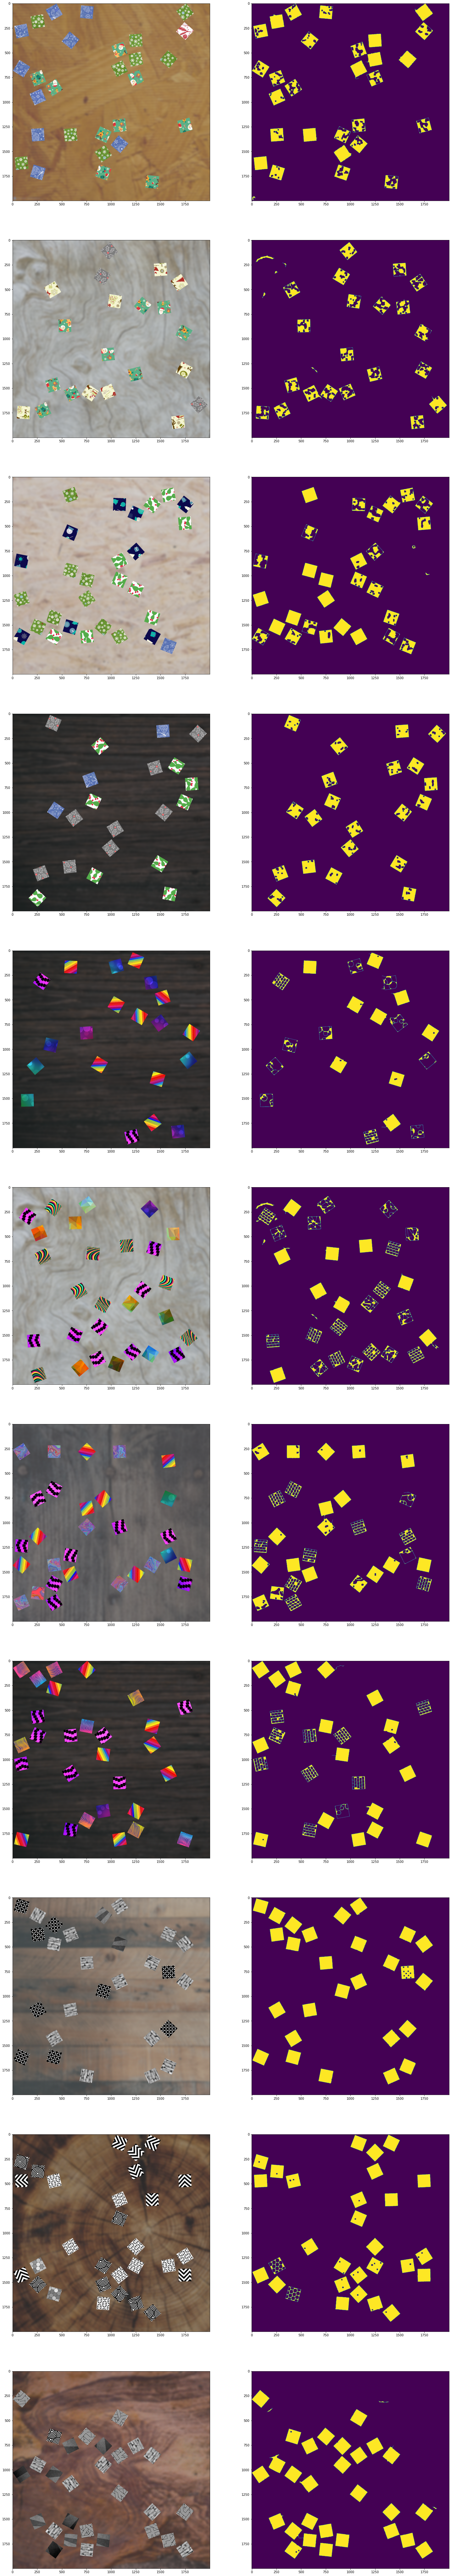

In [15]:
fig, ax = plt.subplots(11, 2, figsize=(25, 150))


for i in range(11):
    ax[i][0].imshow(train_image[i])
    ax[i][1].imshow(edge_image[i])

In [16]:
len(all_contours[0])

29

In [17]:
test = 5

Test if contour are square

In [18]:


# Parcourir tous les contours et filtrer en fonction de la forme et de la taille
filtered_contours = []
for i in range(nb_piece[test]) :
    contour = all_contours[test][i]
    # Approximer le contour par un polygone
    epsilon = 0.01 * cv2.arcLength(contour, True)
    approx = cv2.approxPolyDP(contour, epsilon, True)
    
    # Vérifier si le polygone a 4 côtés (forme d'un carré)
    if len(approx) == 4:
        # Obtenir le rectangle englobant le contour
        x, y, w, h = cv2.boundingRect(approx)
        
        # Vérifier si la largeur et la hauteur sont supérieures ou égales à 128 pixels
        if w >= 0 and h >= 0:
            filtered_contours.append(approx)
            print(f"Contour {i} : It s a square")
        else :
            print(f"Contour {i} : False")


# Dessiner les contours filtrés sur une nouvelle image
#filtered_image = cv2.drawContours(train_image[test], filtered_contours, -1, (255, 0, 0), 15)
#plt.imshow(filtered_image)

Contour 0 : It s a square
Contour 1 : It s a square
Contour 2 : It s a square
Contour 3 : It s a square
Contour 4 : It s a square
Contour 7 : It s a square
Contour 8 : It s a square
Contour 10 : It s a square
Contour 11 : It s a square
Contour 13 : It s a square
Contour 15 : It s a square
Contour 16 : It s a square
Contour 17 : It s a square
Contour 21 : It s a square
Contour 23 : It s a square
Contour 25 : It s a square


In [19]:
def extract_all_piece(nb_train,all_contours,nb_piece) :

    extracted_piece= []

    for t in range(nb_train): #iterate on all train picture
        extracted_piece.append([])
        for i in range(nb_piece[t]) : #iterate on all piece found

            contour = all_contours[t][i]
            # Approximation du contour par un polygone
            epsilon = 0.01 * cv2.arcLength(contour, True)
            approx = cv2.approxPolyDP(contour, epsilon, True)

            # Calculer le rectangle orienté minimum (ROT)
            rect = cv2.minAreaRect(approx)

            # Extraire le carré de 128 pixels
            box = cv2.boxPoints(rect)
            box = np.int0(box)
            width = int(rect[1][0])
            height = int(rect[1][1])
            src_pts = box.astype("float32")
            dst_pts = np.array([[0, height - 1], [0, 0], [width - 1, 0], [width - 1, height - 1]], dtype="float32")
            M = cv2.getPerspectiveTransform(src_pts, dst_pts)
            warped = cv2.warpPerspective(train_image[t], M, (width, height))
            warped = cv2.resize(warped, (128, 128))

            # Faire quelque chose avec l'image carrée de 128 pixels
            # Par exemple, l'enregistrer ou l'afficher
            #cv2.imwrite("chemin/vers/ton/enregistrement.jpg", warped)


            

            extracted_piece[t].append(warped)

    return extracted_piece


In [20]:
extracted_piece = extract_all_piece(nb_train,all_contours,nb_piece)

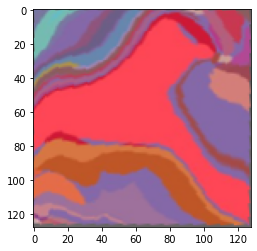

In [21]:
plt.imshow(extracted_piece[6][2])

Show all extracted piece from 1 train

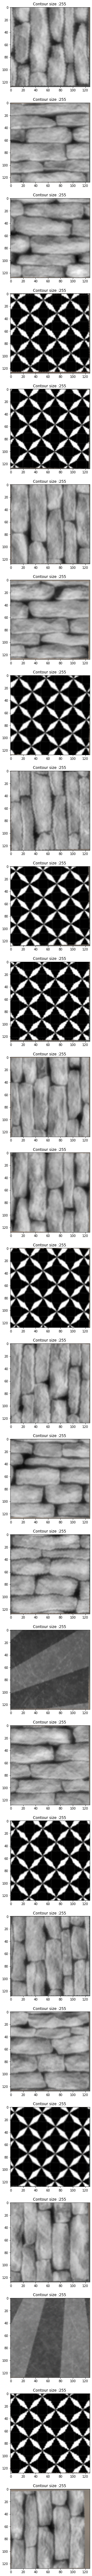

In [74]:
test =8
fig, ax = plt.subplots(nb_piece[test], figsize=(25, 150))

for i in range(nb_piece[test]) :
    

    ax[i].imshow(extracted_piece[test][i])
    ax[i].title.set_text(f"Contour size :{len(contour)} ")

    

In [23]:
import cv2

# Charger l'image en niveaux de gris
image = cv2.imread('votre_image.jpg', 0)

# Appliquer l'algorithme de détection de contours (par exemple Canny)
edges = cv2.Canny(image, 100, 200)

# Trouver les contours dans l'image
contours, _ = cv2.findContours(edges, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

# Parcourir tous les contours et filtrer en fonction de la forme et de la taille
filtered_contours = []
for contour in contours:
    # Approximer le contour par un polygone
    epsilon = 0.01 * cv2.arcLength(contour, True)
    approx = cv2.approxPolyDP(contour, epsilon, True)
    
    # Vérifier si le polygone a 4 côtés (forme d'un carré)
    if len(approx) == 4:
        # Obtenir le rectangle englobant le contour
        x, y, w, h = cv2.boundingRect(approx)
        
        # Vérifier si la largeur et la hauteur sont supérieures ou égales à 128 pixels
        if w >= 128 and h >= 128:
            filtered_contours.append(approx)

# Dessiner les contours filtrés sur une nouvelle image
filtered_image = cv2.drawContours(image, filtered_contours, -1, (0, 255, 0), 2)

# Afficher l'image filtrée
cv2.imshow('Contours filtrés', filtered_image)
cv2.waitKey(0)
cv2.destroyAllWindows()

error: OpenCV(4.5.3) D:\bld\libopencv_1632857399304\work\modules\highgui\src\window.cpp:1006: error: (-215:Assertion failed) size.width>0 && size.height>0 in function 'cv::imshow'


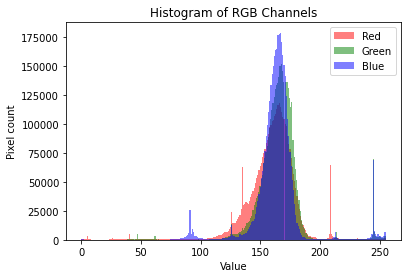

In [ ]:
import matplotlib.pyplot as plt

# Split the image into RGB channels
red_channel = train_image[1][..., 2]
green_channel = train_image[1][..., 1]
blue_channel = train_image[1][..., 0]

# Flatten the channel values
red_values = red_channel.flatten()
green_values = green_channel.flatten()
blue_values = blue_channel.flatten()

# Plot the histograms
plt.figure()
plt.hist(red_values, 256, color='red', alpha=0.5, label='Red')
plt.hist(green_values, 256, color='green', alpha=0.5, label='Green')
plt.hist(blue_values, 256, color='blue', alpha=0.5, label='Blue')
plt.title("Histogram of RGB Channels")
plt.xlabel("Value")
plt.ylabel("Pixel count")
plt.legend()
plt.show()


Segment the puzzle piece from the background

In [ ]:
def solve_and_export_puzzles_image(image_index , folder = "train" , path = "data_project"  , group_id = "00"):
    """
    Wrapper funciton to load image and save solution
            
    Parameters
    ----------
    image:
        index number of the dataset

    Returns
    """

      # open the image
    image_loaded = load_input_image(image_index , folder = folder , path = path)
    #print(image_loaded)
    
   
    ## call functions to solve image_loaded
    solved_puzzles = [ (np.random.rand(512,512,3)*255).astype(np.uint8)  for i in range(2) ]
    outlier_images = [ (np.random.rand(128,128,3)*255).astype(np.uint8) for i in range(3)]
    
    save_solution_puzzles (image_index , solved_puzzles , outlier_images , folder = folder ,group_id =group_id)
    
   
    
    
    
    return image_loaded , solved_puzzles , outlier_images

im, sol , out = solve_and_export_puzzles_image(6 , group_id = 6)

FileNotFoundError: [Errno 2] No such file or directory: 'data_project\\train\\train_06.png'

In [ ]:
group_id = 0
# Evaluate all images
games_id = [6,10]  # to evaluate  three images

for i in games_id :
    
    print("solving " , i)
    # Saving results
    solve_and_export_puzzles_image(6 , group_id = group_id)
  


solving  6
data_project/train_solution_00
solving  10
data_project/train_solution_00


## Evaluation metrics

The evaluation metrics will be liberated in the following days. 


## Gabor filters

$$ gb(x,y) = \exp \left( -\frac{1}{2} \left( \frac{x_{\theta}^2}{\sigma^2} + \frac{y_{\theta}^2}{(\Gamma\sigma)^2} \right) \right) \cos \left( \frac{2 \pi}{\lambda} x_{\theta} + \psi \right) $$


## Truc que j'ai pas utilisé

Partie 2 

Fourrier descriptors


In [24]:
from skimage import feature
import numpy as np

def extract_lbp_features(image_list):
    lbp_features = []
    
    for image in image_list:
        # Convert the RGB image to grayscale
        gray_image = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)
        
        # Extract LBP features
        lbp = feature.local_binary_pattern(gray_image, 8, 1, method='uniform')
        
        # Calculate the histogram of LBP features
        hist, _ = np.histogram(lbp.ravel(), bins=np.arange(0, 257), range=(0, 256))
        
        # Normalize the histogram
        hist = hist.astype("float")
        hist /= (hist.sum() + 1e-7)
        
        # Append the LBP histogram to the feature list
        lbp_features.append(hist)
    
    return lbp_features

In [79]:
import cv2
import numpy as np

def extract_gabor_features(images, num_filters=8, frequencies=[0.1, 0.2, 0.3], orientations=[0,np.pi/4, np.pi/2, 3*np.pi/4]):
    preprocessed_images = images  # You need to define this preprocessing step
    feature_vectors = []

    for img in preprocessed_images:
        filtered_responses = []
        gray_img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

        for frequency in frequencies:
            for orientation in orientations:
                # Create a Gabor kernel with the specified parameters
                gabor_kernel = cv2.getGaborKernel((20, 20), 2, orientation, frequency, 0.3, 0, ktype=cv2.CV_32F)

                # Apply the Gabor filter to the grayscale image
                filtered_img = cv2.filter2D(gray_img, cv2.CV_32F, gabor_kernel)
                # Store the filtered response in a list
                filtered_responses.append(filtered_img)

        # Flatten the filtered responses into a feature vector
        feature_vector = np.concatenate(filtered_responses).ravel()
        feature_vectors.append(feature_vector)

    # Convert the list to a NumPy array
    feature_vectors = np.array(feature_vectors)

    # Apply feature normalization (e.g., z-score normalization)
    feature_vectors = (feature_vectors - np.mean(feature_vectors, axis=0)) / np.std(feature_vectors, axis=0)

    # Extract Gabor features

    # Select the top-k filter responses with the highest importance scores
    top_k = 6
    selected_responses = select_top_filter_responses(feature_vectors, top_k)


    return selected_responses


def calculate_filter_importance(feature_vectors):
    # Calculate the variance of each filter response
    variances = np.var(feature_vectors, axis=0)

    # Sort the variances in descending order and get the corresponding indices
    sorted_indices = np.argsort(variances)[::-1]

    return sorted_indices

def select_top_filter_responses(feature_vectors, top_k):
    # Calculate the importance/relevance of each filter response
    importance_scores = calculate_filter_importance(feature_vectors)

    # Select the top-k filter responses with the highest importance scores
    top_responses = feature_vectors[:, importance_scores[:top_k]]

    return top_responses



def extract_hue_indicator(images):
    hue_features = []

    for image in images:
        # Convert the image from RGB to HSV color space
        image = np.uint8(image)  # Convert to np.uint8 if necessary
        hsv_image = cv2.cvtColor(image, cv2.COLOR_RGB2HSV)
        
        # Extract the hue channel
        hue_channel = hsv_image[:,:,0]
        
        # Calculate statistical measures of the hue values
        hue_mean = np.mean(hue_channel)
        hue_variance = np.var(hue_channel)
        
        # Append the hue indicator features to the list
        hue_features.append([hue_mean, hue_variance])

    # Convert the list to a NumPy array
    hue_features = np.array(hue_features)

    # Apply feature normalization (e.g., z-score normalization)
    hue_features = (hue_features - np.mean(hue_features, axis=0)) / np.std(hue_features, axis=0)

    return hue_features


def extract_dominant_colors(images, num_colors=1):
    dominant_colors = []

    for image in images:
        # Reshape the image into a 2D array of pixels
        pixels = image.reshape(-1, 3)
        
        # Perform k-means clustering to find dominant colors
        _, labels, centers = cv2.kmeans(pixels.astype(np.float32), num_colors, None,
                                        criteria=(cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 10, 1.0),
                                        attempts=10, flags=cv2.KMEANS_RANDOM_CENTERS)
        
        # Convert the centers to uint8 RGB values
        colors = centers.astype(np.uint8)
        
        # Append the dominant color(s) to the list
        dominant_colors.append(colors.squeeze(axis=0))

    # Convert the list to a NumPy array
    dominant_colors = np.array(dominant_colors)

    # Apply feature normalization (e.g., min-max normalization)
    dominant_colors = (dominant_colors - np.min(dominant_colors, axis=0)) / (np.max(dominant_colors, axis=0) - np.min(dominant_colors, axis=0))

    return dominant_colors


In [26]:
from sklearn.cluster import KMeans

def classify_images(features, num_clusters):
    # Perform k-means clustering on the feature vectors
    kmeans = KMeans(n_clusters=num_clusters)
    kmeans.fit(features)

    # Retrieve the cluster labels assigned to each feature vector
    labels = kmeans.labels_

    # Return the cluster labels
    return labels


from sklearn.metrics import pairwise_distances_argmin_min


def kmeans_manhattan(X, n_clusters, max_iter=300, random_state=None):
    # Initialize cluster centers randomly
    rng = np.random.default_rng(random_state)
    indices = rng.choice(len(X), n_clusters, replace=False)
    centers = X[indices]

    for _ in range(max_iter):
        # Calculate pairwise Manhattan distances between data points and cluster centers
        distances = pairwise_distances_argmin_min(X, centers, metric='manhattan')[0]

        # Update cluster centers
        new_centers = np.array([X[distances == i].mean(axis=0) for i in range(n_clusters)])

        # Check convergence
        if np.all(centers == new_centers):
            break

        centers = new_centers

    labels = pairwise_distances_argmin_min(X, centers, metric='manhattan')[0]

    return labels


In [27]:
def find_optimal_clusters(features, max_clusters):
    distortions = []
    for i in range(1, max_clusters + 1):
        kmeans = KMeans(n_clusters=i)
        kmeans.fit(features)
        distortions.append(kmeans.inertia_)

    # Plotting the elbow curve
    plt.plot(range(1, max_clusters + 1), distortions, marker='o')
    plt.xlabel('Number of clusters')
    plt.ylabel('Distortion')
    plt.title('Elbow Method')
    plt.show()

In [80]:
feature_vector = []
i=8

gabor_features = extract_gabor_features(extracted_piece[i])
hue_features = extract_hue_indicator(extracted_piece[i])
dominant_colors = extract_dominant_colors(extracted_piece[i])

print(gabor_features)
print(dominant_colors)

# Combine the feature vectors for each image
feature_vectors = np.concatenate((gabor_features, dominant_colors), axis=1)



# Continue with your existing code...
#find_optimal_clusters(feature_vector, 5)
GT = kmeans_manhattan(dominant_colors, 3)

print(GT)

[[ 7.47699201e-01  1.60688385e-01 -1.62048638e-02 -1.62048638e-02
  -2.09356710e-01 -1.78936589e+00]
 [ 7.83230737e-02  4.93457317e-01  6.71501696e-01  6.71501696e-01
   1.03448831e-01 -3.37807059e-01]
 [ 2.20491454e-01  1.54408261e-01  9.42262411e-01  9.42262411e-01
  -3.74977231e-01 -4.76749599e-01]
 [ 5.26875079e-01  1.04187645e-01 -5.22240877e-01 -5.22240877e-01
  -4.35941249e-01 -4.47955914e-02]
 [-4.62932873e+00 -4.42218828e+00 -1.13867104e+00 -1.13867104e+00
   4.06933355e+00  3.74271226e+00]
 [ 2.66783148e-01  5.11248231e-01  6.01834059e-01  6.01834059e-01
  -1.13092864e+00  9.57600236e-01]
 [-2.04470590e-01  1.23933196e-01  1.66171563e+00  1.66171563e+00
   4.80122834e-01 -6.64958417e-01]
 [-4.78178501e-01  1.28837228e-01 -2.26795340e+00 -2.26795340e+00
  -1.20287433e-01  8.89866427e-02]
 [ 4.68336731e-01  1.14427805e-01  7.97508061e-01  7.97508061e-01
   8.38537633e-01 -8.48155439e-01]
 [-9.31426525e-01 -1.48986328e+00 -9.11919475e-01 -9.11919475e-01
  -1.31793594e+00  1.5683

In [81]:
print(GT)

[0 0 0 1 1 0 0 1 0 1 1 0 0 1 0 0 0 2 0 1 0 0 1 0 2 1 0]


In [30]:
i = 0
j = 0
n_cluster = 3
puzzle = [[] for _ in range(n_cluster)]

while i < n_cluster:
    for j in range(len(GT)):
        if GT[j] == i:
            puzzle[i].append(extracted_piece[8][j])
    i += 1

In [31]:
import matplotlib.pyplot as plt

while i < n_cluster:
    plt.figure(figsize=(8, 8))
    for k in range(16):
        plt.subplot(4, 4, k+1)
        plt.imshow(puzzle[i][k])
        plt.axis('off')
    plt.suptitle(f'Puzzle {i}')
    plt.show()

In [32]:
while i < n_cluster:
    if len(puzzle[i]) == 16:
        plt.figure(figsize=(8, 8))
        for k in range(16):
            plt.subplot(4, 4, k+1)
            plt.imshow(puzzle[i][k])
            plt.axis('off')
        plt.suptitle(f'Puzzle {i}')
        plt.show()

    elif len(puzzle[i]) == 12:
        plt.figure(figsize=(9, 8))
        for k in range(12):
            plt.subplot(4, 3, k+1)
            plt.imshow(puzzle[i][k])
            plt.axis('off')
        plt.suptitle(f'Puzzle {i}')
        plt.show()

    elif len(puzzle[i]) == 9:
        plt.figure(figsize=(8, 8))
        for k in range(9):
            plt.subplot(3, 3, k+1)
            plt.imshow(puzzle[i][k])
            plt.axis('off')
        plt.suptitle(f'Puzzle {i}')
        plt.show()

    i += 1


In [33]:
def solve_and_export_puzzles_image(image_index , folder = "train" , path = "data_project"  , group_id = "00"):
    """
    Wrapper funciton to load image and save solution
            
    Parameters
    ----------
    image:
        index number of the dataset

    Returns
    """

      # open the image
    image_loaded = load_input_image(image_index , folder = folder , path = path)
    #print(image_loaded)
    
   
    ## call functions to solve image_loaded
    solved_puzzles = [ (np.random.rand(512,512,3)*255).astype(np.uint8)  for i in range(2) ]
    outlier_images = [ (np.random.rand(128,128,3)*255).astype(np.uint8) for i in range(3)]
    
    save_solution_puzzles (image_index , solved_puzzles , outlier_images , folder = folder ,group_id =group_id)
    
   
    
    
    
    return image_loaded , solved_puzzles , outlier_images

im, sol , out = solve_and_export_puzzles_image(6 , group_id = 6)

FileNotFoundError: [Errno 2] No such file or directory: 'data_project\\train\\train_06.png'

In [ ]:
group_id = 0
# Evaluate all images
games_id = [6,10]  # to evaluate  three images

for i in games_id :
    
    print("solving " , i)
    # Saving results
    solve_and_export_puzzles_image(6 , group_id = group_id)
  


solving  6
data_project/train_solution_00
solving  10
data_project/train_solution_00


## Evaluation metrics

The evaluation metrics will be liberated in the following days. 


## Gabor filters

$$ gb(x,y) = \exp \left( -\frac{1}{2} \left( \frac{x_{\theta}^2}{\sigma^2} + \frac{y_{\theta}^2}{(\Gamma\sigma)^2} \right) \right) \cos \left( \frac{2 \pi}{\lambda} x_{\theta} + \psi \right) $$
